In [1]:
# For data manipulation
import pandas as pd              

# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

In [2]:
orders = pd.read_csv('orders.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [3]:
orders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))] 

In [4]:
# We convert character variables into category. 
# In Python, a categorical variable is called category and has a fixed number of different values
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [5]:
#Merge the orders DF with order_products_prior by their order_id, keep only these rows with order_id that they are appear on both DFs
op = orders.merge(order_products_prior, on='order_id', how='inner')
op.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2565571,7,prior,1,3,9,NaN,45628,1,0
1,2565571,7,prior,1,3,9,NaN,39275,2,0
2,2565571,7,prior,1,3,9,NaN,6361,3,0
3,2565571,7,prior,1,3,9,NaN,45066,4,0
4,2565571,7,prior,1,3,9,NaN,13249,5,0


In [6]:
op['order_number_back'] = op.groupby('user_id')['order_number'].transform(max) - op.order_number +1
op5 = op[op.order_number_back <= 5]
op5.head()
last_five = op5.groupby(['user_id','product_id'])[['order_id']].count()
last_five.columns = ['times_last5']
last_five = last_five.reset_index()
last_five.head(10)

,user_id,product_id,times_last5
0,7,4920,2
1,7,4945,3
2,7,8277,1
3,7,8518,1
4,7,9598,1
5,7,10504,1
6,7,11520,1
7,7,12196,2
8,7,13198,2
9,7,15592,2


In [7]:
last_five.tail()

,user_id,product_id,times_last5
666772,206202,45850,1
666773,206202,46049,1
666774,206202,46908,1
666775,206202,47553,1
666776,206202,49683,2


In [8]:
last_five['times_last5_ratio'] = last_five.times_last5 / 5
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio
0,7,4920,2,0.4
1,7,4945,3,0.6
2,7,8277,1,0.2
3,7,8518,1,0.2
4,7,9598,1,0.2


In [9]:
max_days_since_last_order_l5 = op5.groupby(['user_id','product_id'])[['days_since_prior_order']].max()
max_days_since_last_order_l5.columns = ['max_days_since_last5'] 
max_days_since_last_order_l5 = max_days_since_last_order_l5.reset_index() 
max_days_since_last_order_l5.head()

,user_id,product_id,max_days_since_last5
0,7,4920,28.0
1,7,4945,28.0
2,7,8277,28.0
3,7,8518,7.0
4,7,9598,7.0


In [10]:
max_days_since_last_order_l5 = max_days_since_last_order_l5.fillna(0)
max_days_since_last_order_l5.head()

,user_id,product_id,max_days_since_last5
0,7,4920,28.0
1,7,4945,28.0
2,7,8277,28.0
3,7,8518,7.0
4,7,9598,7.0


In [11]:
last_five = last_five.merge(max_days_since_last_order_l5, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5
0,7,4920,2,0.4,28.0
1,7,4945,3,0.6,28.0
2,7,8277,1,0.2,28.0
3,7,8518,1,0.2,7.0
4,7,9598,1,0.2,7.0


In [12]:
del [max_days_since_last_order_l5]

In [13]:
max_days_since_last_order = op.groupby(['user_id','product_id'])[['days_since_prior_order']].max()
max_days_since_last_order.columns = ['max_days_since_last'] 
max_days_since_last_order = max_days_since_last_order.reset_index() 
max_days_since_last_order.head()

,user_id,product_id,max_days_since_last
0,7,274,30.0
1,7,519,30.0
2,7,4920,30.0
3,7,4945,28.0
4,7,6361,30.0


In [14]:
max_days_since_last_order = max_days_since_last_order.fillna(0)
max_days_since_last_order.head()

,user_id,product_id,max_days_since_last
0,7,274,30.0
1,7,519,30.0
2,7,4920,30.0
3,7,4945,28.0
4,7,6361,30.0


In [15]:
days_since_last_order = op.groupby(['user_id','product_id'])[['days_since_prior_order']].count()
days_since_last_order.columns = ['days_since_last_order'] 
days_since_last_order = days_since_last_order.reset_index() 
days_since_last_order.head()

,user_id,product_id,days_since_last_order
0,7,274,1
1,7,519,1
2,7,4920,7
3,7,4945,3
4,7,6361,4


In [16]:
days_since_last_order = days_since_last_order.fillna(0)
days_since_last_order.head()

,user_id,product_id,days_since_last_order
0,7,274,1
1,7,519,1
2,7,4920,7
3,7,4945,3
4,7,6361,4


In [17]:
days_last_order_max = pd.merge(days_since_last_order, max_days_since_last_order , on=['user_id', 'product_id'], how='left')
days_last_order_max.head()

,user_id,product_id,days_since_last_order,max_days_since_last
0,7,274,1,30.0
1,7,519,1,30.0
2,7,4920,7,30.0
3,7,4945,3,28.0
4,7,6361,4,30.0


In [18]:
days_last_order_max['days_last_order_max'] = days_last_order_max.days_since_last_order / days_last_order_max.max_days_since_last
days_last_order_max.head()

,user_id,product_id,days_since_last_order,max_days_since_last,days_last_order_max
0,7,274,1,30.0,0.033333
1,7,519,1,30.0,0.033333
2,7,4920,7,30.0,0.233333
3,7,4945,3,28.0,0.107143
4,7,6361,4,30.0,0.133333


In [19]:
del [days_since_last_order, max_days_since_last_order]

In [20]:
last_five = last_five.merge(days_last_order_max, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max
0,7,4920,2,0.4,28.0,7,30.0,0.233333
1,7,4945,3,0.6,28.0,3,28.0,0.107143
2,7,8277,1,0.2,28.0,3,28.0,0.107143
3,7,8518,1,0.2,7.0,3,30.0,0.100000
4,7,9598,1,0.2,7.0,3,30.0,0.100000


In [21]:
median_days_since_last_order_l5 = op5.groupby(['user_id','product_id'])[['days_since_prior_order']].median()
median_days_since_last_order_l5.columns = ['median_days_since_last5'] 
median_days_since_last_order_l5 = median_days_since_last_order_l5.reset_index() 
median_days_since_last_order_l5.head()

,user_id,product_id,median_days_since_last5
0,7,4920,19.5
1,7,4945,11.0
2,7,8277,28.0
3,7,8518,7.0
4,7,9598,7.0


In [22]:
median_days_since_last_order = op.groupby(['user_id','product_id'])[['days_since_prior_order']].median()
median_days_since_last_order.columns = ['median_days_since_last'] 
median_days_since_last_order = median_days_since_last_order.reset_index() 
median_days_since_last_order.head()

,user_id,product_id,median_days_since_last
0,7,274,30.0
1,7,519,30.0
2,7,4920,9.0
3,7,4945,11.0
4,7,6361,19.5


In [23]:
median_days_since_last_order = median_days_since_last_order.merge(median_days_since_last_order_l5, on=['user_id','product_id'], how='left')
median_days_since_last_order.head()

,user_id,product_id,median_days_since_last,median_days_since_last5
0,7,274,30.0,NaN
1,7,519,30.0,NaN
2,7,4920,9.0,19.5
3,7,4945,11.0,11.0
4,7,6361,19.5,NaN


In [24]:
median_days_since_last_order = median_days_since_last_order.fillna(0)
median_days_since_last_order.head()

,user_id,product_id,median_days_since_last,median_days_since_last5
0,7,274,30.0,0.0
1,7,519,30.0,0.0
2,7,4920,9.0,19.5
3,7,4945,11.0,11.0
4,7,6361,19.5,0.0


In [25]:
del [median_days_since_last_order_l5]

In [26]:
min_days_since_last_order_l5 = op5.groupby(['user_id','product_id'])[['days_since_prior_order']].min()
min_days_since_last_order_l5.columns = ['min_days_since_last5'] 
min_days_since_last_order_l5 = min_days_since_last_order_l5.reset_index() 
min_days_since_last_order_l5.head()

,user_id,product_id,min_days_since_last5
0,7,4920,11.0
1,7,4945,7.0
2,7,8277,28.0
3,7,8518,7.0
4,7,9598,7.0


In [27]:
min_days_since_last_order_l5 = min_days_since_last_order_l5.fillna(0)
min_days_since_last_order_l5.head()

,user_id,product_id,min_days_since_last5
0,7,4920,11.0
1,7,4945,7.0
2,7,8277,28.0
3,7,8518,7.0
4,7,9598,7.0


In [28]:
last_five = last_five.merge(min_days_since_last_order_l5, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5
0,7,4920,2,0.4,28.0,7,30.0,0.233333,11.0
1,7,4945,3,0.6,28.0,3,28.0,0.107143,7.0
2,7,8277,1,0.2,28.0,3,28.0,0.107143,28.0
3,7,8518,1,0.2,7.0,3,30.0,0.100000,7.0
4,7,9598,1,0.2,7.0,3,30.0,0.100000,7.0


In [29]:
del [min_days_since_last_order_l5]

In [30]:
mean_days_since_last_order_l5 = op5.groupby(['user_id','product_id'])[['days_since_prior_order']].mean()
mean_days_since_last_order_l5.columns = ['mean_days_since_last5'] 
mean_days_since_last_order_l5 = mean_days_since_last_order_l5.reset_index() 
mean_days_since_last_order_l5.head()

,user_id,product_id,mean_days_since_last5
0,7,4920,19.500000
1,7,4945,15.333333
2,7,8277,28.000000
3,7,8518,7.000000
4,7,9598,7.000000


In [31]:
mean_days_since_last_order_l5 = mean_days_since_last_order_l5.fillna(0) 
mean_days_since_last_order_l5.head()

,user_id,product_id,mean_days_since_last5
0,7,4920,19.500000
1,7,4945,15.333333
2,7,8277,28.000000
3,7,8518,7.000000
4,7,9598,7.000000


In [32]:
last_five = last_five.merge(mean_days_since_last_order_l5, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5
0,7,4920,2,0.4,28.0,7,30.0,0.233333,11.0,19.500000
1,7,4945,3,0.6,28.0,3,28.0,0.107143,7.0,15.333333
2,7,8277,1,0.2,28.0,3,28.0,0.107143,28.0,28.000000
3,7,8518,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000
4,7,9598,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000


In [33]:
del [mean_days_since_last_order_l5]

In [34]:
last_five = last_five.merge(median_days_since_last_order, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5,median_days_since_last,median_days_since_last5
0,7,4920,2,0.4,28.0,7,30.0,0.233333,11.0,19.500000,9.0,19.5
1,7,4945,3,0.6,28.0,3,28.0,0.107143,7.0,15.333333,11.0,11.0
2,7,8277,1,0.2,28.0,3,28.0,0.107143,28.0,28.000000,5.0,28.0
3,7,8518,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000,7.0,7.0
4,7,9598,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000,30.0,7.0


In [35]:
del [median_days_since_last_order]

In [36]:
avg_pos = op.groupby('product_id').filter(lambda x: x.shape[0]>30)
avg_pos = op.groupby('product_id')['add_to_cart_order'].mean().to_frame('average_position_of_a_product')
avg_pos.head()

,average_position_of_a_product
product_id,
1,7.878049
2,11.384615
3,4.533333
4,6.972973
6,26.000000


In [37]:
avg_pos = avg_pos.reset_index()
avg_pos.head()

,product_id,average_position_of_a_product
0,1,7.878049
1,2,11.384615
2,3,4.533333
3,4,6.972973
4,6,26.000000


In [38]:
prr = op.groupby('product_id').filter(lambda x: x.shape[0] >40)
prr = op.groupby('product_id')['reordered'].mean().to_frame('product_reordered_ratio') #
prr.head()

,product_reordered_ratio
product_id,
1,0.692683
2,0.230769
3,0.466667
4,0.540541
6,0.000000


In [39]:
prr = prr.reset_index()
prr.head()

,product_id,product_reordered_ratio
0,1,0.692683
1,2,0.230769
2,3,0.466667
3,4,0.540541
4,6,0.000000


In [40]:
prr = prr.merge(avg_pos, on='product_id', how='left')
prr.head()

,product_id,product_reordered_ratio,average_position_of_a_product
0,1,0.692683,7.878049
1,2,0.230769,11.384615
2,3,0.466667,4.533333
3,4,0.540541,6.972973
4,6,0.000000,26.000000


In [41]:
order_size = op.groupby(['user_id', 'order_id'])['product_id'].count().to_frame('size')
order_size = order_size.reset_index()
order_size.head()

,user_id,order_id,size
0,7,23391,11
1,7,121053,24
2,7,369015,5
3,7,565870,9
4,7,776265,8


In [42]:
avg_os = order_size.groupby('user_id')['size'].mean().to_frame('average_order_size_for_user')
avg_os = avg_os.reset_index()
avg_os.head()

,user_id,average_order_size_for_user
0,7,10.300000
1,14,16.153846
2,22,4.600000
3,24,2.111111
4,29,12.500000


In [43]:
last_five = last_five.merge(avg_os, on='user_id', how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5,median_days_since_last,median_days_since_last5,average_order_size_for_user
0,7,4920,2,0.4,28.0,7,30.0,0.233333,11.0,19.500000,9.0,19.5,10.3
1,7,4945,3,0.6,28.0,3,28.0,0.107143,7.0,15.333333,11.0,11.0,10.3
2,7,8277,1,0.2,28.0,3,28.0,0.107143,28.0,28.000000,5.0,28.0,10.3
3,7,8518,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000,7.0,7.0,10.3
4,7,9598,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000,30.0,7.0,10.3


In [44]:
del [order_size, avg_os]

In [45]:
aatco = op.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().to_frame('average_add_to_cart_order')
aatco = aatco.reset_index()
aatco.head()

,user_id,product_id,average_add_to_cart_order
0,7,274,16.000000
1,7,519,10.500000
2,7,4920,4.714286
3,7,4945,11.333333
4,7,6361,7.200000


In [46]:
adspo = op.groupby('user_id')['days_since_prior_order'].mean().to_frame('average_days_since_prior_order')
adspo = adspo.reset_index()
adspo.head()

,user_id,average_days_since_prior_order
0,7,13.546392
1,14,24.570732
2,22,11.952381
3,24,15.162162
4,29,11.793427


In [47]:
aatco = aatco.merge(adspo, on='user_id', how='left')
aatco.head()

,user_id,product_id,average_add_to_cart_order,average_days_since_prior_order
0,7,274,16.000000,13.546392
1,7,519,10.500000,13.546392
2,7,4920,4.714286,13.546392
3,7,4945,11.333333,13.546392
4,7,6361,7.200000,13.546392


In [48]:
del [adspo]

In [49]:
last_five = last_five.merge(aatco, on=['user_id','product_id'], how='left')
last_five.head()

,user_id,product_id,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5,median_days_since_last,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order
0,7,4920,2,0.4,28.0,7,30.0,0.233333,11.0,19.500000,9.0,19.5,10.3,4.714286,13.546392
1,7,4945,3,0.6,28.0,3,28.0,0.107143,7.0,15.333333,11.0,11.0,10.3,11.333333,13.546392
2,7,8277,1,0.2,28.0,3,28.0,0.107143,28.0,28.000000,5.0,28.0,10.3,3.333333,13.546392
3,7,8518,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000,7.0,7.0,10.3,7.000000,13.546392
4,7,9598,1,0.2,7.0,3,30.0,0.100000,7.0,7.000000,30.0,7.0,10.3,11.666667,13.546392


In [50]:
del [aatco]

In [51]:
user = op.groupby('user_id')['order_number'].max().to_frame('u_total_orders')
user = user.reset_index()
user.head()

,user_id,u_total_orders
0,7,20
1,14,13
2,22,15
3,24,18
4,29,18


In [52]:
urr = op.groupby('user_id')['reordered'].mean().to_frame('user_reordered_ratio') #
urr = urr.reset_index()
urr.head()

,user_id,user_reordered_ratio
0,7,0.669903
1,14,0.323810
2,22,0.507246
3,24,0.526316
4,29,0.702222


In [53]:
user = user.merge(urr, on='user_id', how='left')

del urr
gc.collect()

user.head() 

,user_id,u_total_orders,user_reordered_ratio
0,7,20,0.669903
1,14,13,0.323810
2,22,15,0.507246
3,24,18,0.526316
4,29,18,0.702222


In [54]:
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought')
uxp.head()

uxp_total_bought
user_id product_id                  
7       274                        1
        519                        2
        4920                       7
        4945                       3
        6361                       5

In [55]:
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_total_bought
0,7,274,1
1,7,519,2
2,7,4920,7
3,7,4945,3
4,7,6361,5


In [56]:
times = op.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
7       274                      1
        519                      2
        4920                     7
        4945                     3
        6361                     5

In [57]:
total_orders = op.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()

,total_orders
user_id,
7,20
14,13
22,15
24,18
29,18


In [58]:
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,7,274,2
1,7,519,1
2,7,4920,2
3,7,4945,16
4,7,6361,1


In [59]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,7,20,274,2
1,7,20,519,1
2,7,20,4920,2
3,7,20,4945,16
4,7,20,6361,1


In [60]:
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,7,20,274,2,19
1,7,20,519,1,20
2,7,20,4920,2,19
3,7,20,4945,16,5
4,7,20,6361,1,20


In [61]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,7,274,1,20,2,19
1,7,519,2,20,1,20
2,7,4920,7,20,2,19
3,7,4945,3,20,16,5
4,7,6361,5,20,1,20


In [62]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,7,274,1,20,2,19,0.052632
1,7,519,2,20,1,20,0.100000
2,7,4920,7,20,2,19,0.368421
3,7,4945,3,20,16,5,0.600000
4,7,6361,5,20,1,20,0.250000


In [63]:
uxp_ratio = uxp_ratio.drop(['Times_Bought_N', 'total_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_reorder_ratio
0,7,274,0.052632
1,7,519,0.100000
2,7,4920,0.368421
3,7,4945,0.600000
4,7,6361,0.250000


In [64]:
del [times, first_order_no, span]

In [65]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio
0,7,274,1,0.052632
1,7,519,2,0.100000
2,7,4920,7,0.368421
3,7,4945,3,0.600000
4,7,6361,5,0.250000


In [66]:
uxp_last5 = op5.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought_l5')
uxp_last5.head()

uxp_total_bought_l5
user_id product_id                     
7       4920                          2
        4945                          3
        8277                          1
        8518                          1
        9598                          1

In [67]:
uxp_last5 = uxp_last5.reset_index()
uxp_last5.head()

,user_id,product_id,uxp_total_bought_l5
0,7,4920,2
1,7,4945,3
2,7,8277,1
3,7,8518,1
4,7,9598,1


In [68]:
times_l5 = op5.groupby(['user_id', 'product_id'])[['order_id']].count()
times_l5.columns = ['Times_Bought_N_l5']
times_l5.head()

Times_Bought_N_l5
user_id product_id                   
7       4920                        2
        4945                        3
        8277                        1
        8518                        1
        9598                        1

In [69]:
total_orders_l5 = op5.groupby('user_id')['order_number'].max().to_frame('total_orders_l5')
total_orders_l5.head()

,total_orders_l5
user_id,
7,20
14,13
22,15
24,18
29,18


In [70]:
first_order_no_l5 = op5.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number_l5')
first_order_no_l5  = first_order_no_l5.reset_index()
first_order_no_l5.head()

,user_id,product_id,first_order_number_l5
0,7,4920,16
1,7,4945,16
2,7,8277,17
3,7,8518,18
4,7,9598,20


In [71]:
span_l5 = pd.merge(total_orders_l5, first_order_no_l5, on='user_id', how='right')
span_l5.head()

,user_id,total_orders_l5,product_id,first_order_number_l5
0,7,20,4920,16
1,7,20,4945,16
2,7,20,8277,17
3,7,20,8518,18
4,7,20,9598,20


In [72]:
span_l5['Order_Range_D_l5'] = span_l5.total_orders_l5 - span_l5.first_order_number_l5 + 1
span_l5.head()

,user_id,total_orders_l5,product_id,first_order_number_l5,Order_Range_D_l5
0,7,20,4920,16,5
1,7,20,4945,16,5
2,7,20,8277,17,4
3,7,20,8518,18,3
4,7,20,9598,20,1


In [73]:
uxp_ratio_last5 = pd.merge(times_l5, span_l5, on=['user_id', 'product_id'], how='left')
uxp_ratio_last5.head()

,user_id,product_id,Times_Bought_N_l5,total_orders_l5,first_order_number_l5,Order_Range_D_l5
0,7,4920,2,20,16,5
1,7,4945,3,20,16,5
2,7,8277,1,20,17,4
3,7,8518,1,20,18,3
4,7,9598,1,20,20,1


In [74]:
uxp_ratio_last5['uxp_reorder_ratio_last5'] = uxp_ratio_last5.Times_Bought_N_l5 / uxp_ratio_last5.Order_Range_D_l5
uxp_ratio_last5.head()

,user_id,product_id,Times_Bought_N_l5,total_orders_l5,first_order_number_l5,Order_Range_D_l5,uxp_reorder_ratio_last5
0,7,4920,2,20,16,5,0.400000
1,7,4945,3,20,16,5,0.600000
2,7,8277,1,20,17,4,0.250000
3,7,8518,1,20,18,3,0.333333
4,7,9598,1,20,20,1,1.000000


In [75]:
uxp_ratio_last5 = uxp_ratio_last5.drop(['Times_Bought_N_l5', 'total_orders_l5', 'first_order_number_l5', 'Order_Range_D_l5'], axis=1)
uxp_ratio_last5.head()

,user_id,product_id,uxp_reorder_ratio_last5
0,7,4920,0.400000
1,7,4945,0.600000
2,7,8277,0.250000
3,7,8518,0.333333
4,7,9598,1.000000


In [76]:
del [times_l5, first_order_no_l5, span_l5]

In [77]:
uxp = uxp.merge(uxp_ratio_last5, on=['user_id', 'product_id'], how='left')

In [78]:
del uxp_ratio_last5
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5
0,7,274,1,0.052632,NaN
1,7,519,2,0.100000,NaN
2,7,4920,7,0.368421,0.4
3,7,4945,3,0.600000,0.6
4,7,6361,5,0.250000,NaN


In [79]:
uxp = uxp.merge(last_five, on=['user_id', 'product_id'], how='left')

del [last_five]
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5,median_days_since_last,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order
0,7,274,1,0.052632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,519,2,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,4920,7,0.368421,0.4,2.0,0.4,28.0,7.0,30.0,0.233333,11.0,19.500000,9.0,19.5,10.3,4.714286,13.546392
3,7,4945,3,0.600000,0.6,3.0,0.6,28.0,3.0,28.0,0.107143,7.0,15.333333,11.0,11.0,10.3,11.333333,13.546392
4,7,6361,5,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
uxp = uxp.fillna(0)
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5,median_days_since_last,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order
0,7,274,1,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,7,519,2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,7,4920,7,0.368421,0.4,2.0,0.4,28.0,7.0,30.0,0.233333,11.0,19.500000,9.0,19.5,10.3,4.714286,13.546392
3,7,4945,3,0.600000,0.6,3.0,0.6,28.0,3.0,28.0,0.107143,7.0,15.333333,11.0,11.0,10.3,11.333333,13.546392
4,7,6361,5,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [81]:
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,days_last_order_max,min_days_since_last5,mean_days_since_last5,median_days_since_last,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio
0,7,274,1,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,20,0.669903
1,7,519,2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,20,0.669903
2,7,4920,7,0.368421,0.4,2.0,0.4,28.0,7.0,30.0,0.233333,11.0,19.500000,9.0,19.5,10.3,4.714286,13.546392,20,0.669903
3,7,4945,3,0.600000,0.6,3.0,0.6,28.0,3.0,28.0,0.107143,7.0,15.333333,11.0,11.0,10.3,11.333333,13.546392,20,0.669903
4,7,6361,5,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,20,0.669903


In [82]:
data = data.merge(prr, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,...,mean_days_since_last5,median_days_since_last,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio,product_reordered_ratio,average_position_of_a_product
0,7,274,1,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,20,0.669903,0.301724,10.719828
1,7,519,2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,20,0.669903,0.657658,8.549550
2,7,4920,7,0.368421,0.4,2.0,0.4,28.0,7.0,30.0,...,19.500000,9.0,19.5,10.3,4.714286,13.546392,20,0.669903,0.666010,8.335343
3,7,4945,3,0.600000,0.6,3.0,0.6,28.0,3.0,28.0,...,15.333333,11.0,11.0,10.3,11.333333,13.546392,20,0.669903,0.732888,7.193656
4,7,6361,5,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,20,0.669903,0.756757,7.657658


In [83]:
del op, user, prr, uxp
gc.collect()

160

In [84]:
## First approach:
# In two steps keep only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

## Second approach (if you want to test it you have to re-run the notebook):
# In one step keep only the future orders from all customers: train & test 
#orders_future = orders.loc[((orders.eval_set=='train') | (orders.eval_set=='test')), ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

## Third approach (if you want to test it you have to re-run the notebook):
# In one step exclude all the prior orders so to deal with the future orders from all customers
#orders_future = orders.loc[orders.eval_set!='prior', ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

,user_id,eval_set,order_id
74,7,train,525192
129,14,train,2316178
272,22,test,139655
296,24,train,965160
439,29,train,3110252
485,34,train,698604
570,38,train,3173750
588,40,test,2431024
669,48,train,2924697
999,64,train,2639013


In [85]:
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,...,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio,product_reordered_ratio,average_position_of_a_product,eval_set,order_id
0,7,274,1,0.052632,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.301724,10.719828,train,525192
1,7,519,2,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.657658,8.549550,train,525192
2,7,4920,7,0.368421,0.400000,2.0,0.4,28.0,7.0,30.0,...,19.5,10.3,4.714286,13.546392,20,0.669903,0.666010,8.335343,train,525192
3,7,4945,3,0.600000,0.600000,3.0,0.6,28.0,3.0,28.0,...,11.0,10.3,11.333333,13.546392,20,0.669903,0.732888,7.193656,train,525192
4,7,6361,5,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.756757,7.657658,train,525192
5,7,8277,3,0.375000,0.250000,1.0,0.2,28.0,3.0,28.0,...,28.0,10.3,3.333333,13.546392,20,0.669903,0.755617,7.466518,train,525192
6,7,8518,3,0.157895,0.333333,1.0,0.2,7.0,3.0,30.0,...,7.0,10.3,7.000000,13.546392,20,0.669903,0.627124,9.239309,train,525192
7,7,9598,3,0.157895,1.000000,1.0,0.2,7.0,3.0,30.0,...,7.0,10.3,11.666667,13.546392,20,0.669903,0.684512,9.445507,train,525192
8,7,10504,1,0.200000,0.200000,1.0,0.2,11.0,1.0,11.0,...,11.0,10.3,8.000000,13.546392,20,0.669903,0.492476,9.121751,train,525192
9,7,10895,3,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.594150,9.665448,train,525192


In [86]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train'] #
data_train.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,...,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio,product_reordered_ratio,average_position_of_a_product,eval_set,order_id
0,7,274,1,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.301724,10.719828,train,525192
1,7,519,2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.657658,8.549550,train,525192
2,7,4920,7,0.368421,0.4,2.0,0.4,28.0,7.0,30.0,...,19.5,10.3,4.714286,13.546392,20,0.669903,0.666010,8.335343,train,525192
3,7,4945,3,0.600000,0.6,3.0,0.6,28.0,3.0,28.0,...,11.0,10.3,11.333333,13.546392,20,0.669903,0.732888,7.193656,train,525192
4,7,6361,5,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,20,0.669903,0.756757,7.657658,train,525192


In [87]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,...,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio,product_reordered_ratio,average_position_of_a_product,eval_set,order_id,reordered
0,7,274,1,0.052632,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.301724,10.719828,train,525192,NaN
1,7,519,2,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.657658,8.549550,train,525192,NaN
2,7,4920,7,0.368421,0.400000,2.0,0.4,28.0,7.0,30.0,...,10.3,4.714286,13.546392,20,0.669903,0.666010,8.335343,train,525192,NaN
3,7,4945,3,0.600000,0.600000,3.0,0.6,28.0,3.0,28.0,...,10.3,11.333333,13.546392,20,0.669903,0.732888,7.193656,train,525192,NaN
4,7,6361,5,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.756757,7.657658,train,525192,NaN
5,7,8277,3,0.375000,0.250000,1.0,0.2,28.0,3.0,28.0,...,10.3,3.333333,13.546392,20,0.669903,0.755617,7.466518,train,525192,NaN
6,7,8518,3,0.157895,0.333333,1.0,0.2,7.0,3.0,30.0,...,10.3,7.000000,13.546392,20,0.669903,0.627124,9.239309,train,525192,NaN
7,7,9598,3,0.157895,1.000000,1.0,0.2,7.0,3.0,30.0,...,10.3,11.666667,13.546392,20,0.669903,0.684512,9.445507,train,525192,NaN
8,7,10504,1,0.200000,0.200000,1.0,0.2,11.0,1.0,11.0,...,10.3,8.000000,13.546392,20,0.669903,0.492476,9.121751,train,525192,NaN
9,7,10895,3,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.594150,9.665448,train,525192,NaN


In [88]:
#Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,...,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio,product_reordered_ratio,average_position_of_a_product,eval_set,order_id,reordered
0,7,274,1,0.052632,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.301724,10.719828,train,525192,0.0
1,7,519,2,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.657658,8.549550,train,525192,0.0
2,7,4920,7,0.368421,0.400000,2.0,0.4,28.0,7.0,30.0,...,10.3,4.714286,13.546392,20,0.669903,0.666010,8.335343,train,525192,0.0
3,7,4945,3,0.600000,0.600000,3.0,0.6,28.0,3.0,28.0,...,10.3,11.333333,13.546392,20,0.669903,0.732888,7.193656,train,525192,0.0
4,7,6361,5,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.756757,7.657658,train,525192,0.0
5,7,8277,3,0.375000,0.250000,1.0,0.2,28.0,3.0,28.0,...,10.3,3.333333,13.546392,20,0.669903,0.755617,7.466518,train,525192,0.0
6,7,8518,3,0.157895,0.333333,1.0,0.2,7.0,3.0,30.0,...,10.3,7.000000,13.546392,20,0.669903,0.627124,9.239309,train,525192,0.0
7,7,9598,3,0.157895,1.000000,1.0,0.2,7.0,3.0,30.0,...,10.3,11.666667,13.546392,20,0.669903,0.684512,9.445507,train,525192,0.0
8,7,10504,1,0.200000,0.200000,1.0,0.2,11.0,1.0,11.0,...,10.3,8.000000,13.546392,20,0.669903,0.492476,9.121751,train,525192,0.0
9,7,10895,3,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,20,0.669903,0.594150,9.665448,train,525192,0.0


In [89]:
#We set user_id and product_id as the index of the DF
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
7       274                        1           0.052632   
        519                        2           0.100000   
        4920                       7           0.368421   
        4945                       3           0.600000   
        6361                       5           0.250000   
        8277                       3           0.375000   
        8518                       3           0.157895   
        9598                       3           0.157895   
        10504                      1           0.200000   
        10895                      3           0.166667   
        11520                      1           0.250000   
        12196                      2           0.400000   
        13176                      1           0.166667   
        13198                      8           0.421053   
        13249                      1           0.050000   

                    uxp_reorder_ratio_last5  times_last5  times_last5_ratio  \
user_id product_id                                                            
7       274                        0.000000          0.0                0.0   
        519                        0.000000          0.0                0.0   
        4920                       0.400000          2.0                0.4   
        4945                       0.600000          3.0                0.6   
        6361                       0.000000          0.0                0.0   
        8277                       0.250000          1.0                0.2   
        8518                       0.333333          1.0                0.2   
        9598                       1.000000          1.0                0.2   
        10504                      0.200000          1.0                0.2   
        10895                      0.000000          0.0                0.0   
        11520                      0.250000          1.0                0.2   
        12196                      0.400000          2.0                0.4   
        13176                      0.000000          0.0                0.0   
        13198                      0.500000          2.0                0.4   
        13249                      0.000000          0.0                0.0   

                    max_days_since_last5  days_since_last_order  \
user_id product_id                                                
7       274                          0.0                    0.0   
        519                          0.0                    0.0   
        4920                        28.0                    7.0   
        4945                        28.0                    3.0   
        6361                         0.0                    0.0   
        8277                        28.0                    3.0   
        8518                         7.0                    3.0   
        9598                         7.0                    3.0   
        10504                       11.0                    1.0   
        10895                        0.0                    0.0   
        11520                       28.0                    1.0   
        12196                       11.0                    2.0   
        13176                        0.0                    0.0   
        13198                       28.0                    8.0   
        13249                        0.0                    0.0   

                    max_days_since_last  days_last_order_max  \
user_id product_id                                             
7       274                         0.0             0.000000   
        519                         0.0             0.000000   
        4920                       30.0             0.233333   
        4945                       28.0             0.107143   
        6361                        0.0             0.000000   
        8277                       28.0             0.107143   
        8518        

In [90]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
7       274                        1           0.052632   
        519                        2           0.100000   
        4920                       7           0.368421   
        4945                       3           0.600000   
        6361                       5           0.250000   
        8277                       3           0.375000   
        8518                       3           0.157895   
        9598                       3           0.157895   
        10504                      1           0.200000   
        10895                      3           0.166667   
        11520                      1           0.250000   
        12196                      2           0.400000   
        13176                      1           0.166667   
        13198                      8           0.421053   
        13249                      1           0.050000   

                    uxp_reorder_ratio_last5  times_last5  times_last5_ratio  \
user_id product_id                                                            
7       274                        0.000000          0.0                0.0   
        519                        0.000000          0.0                0.0   
        4920                       0.400000          2.0                0.4   
        4945                       0.600000          3.0                0.6   
        6361                       0.000000          0.0                0.0   
        8277                       0.250000          1.0                0.2   
        8518                       0.333333          1.0                0.2   
        9598                       1.000000          1.0                0.2   
        10504                      0.200000          1.0                0.2   
        10895                      0.000000          0.0                0.0   
        11520                      0.250000          1.0                0.2   
        12196                      0.400000          2.0                0.4   
        13176                      0.000000          0.0                0.0   
        13198                      0.500000          2.0                0.4   
        13249                      0.000000          0.0                0.0   

                    max_days_since_last5  days_since_last_order  \
user_id product_id                                                
7       274                          0.0                    0.0   
        519                          0.0                    0.0   
        4920                        28.0                    7.0   
        4945                        28.0                    3.0   
        6361                         0.0                    0.0   
        8277                        28.0                    3.0   
        8518                         7.0                    3.0   
        9598                         7.0                    3.0   
        10504                       11.0                    1.0   
        10895                        0.0                    0.0   
        11520                       28.0                    1.0   
        12196                       11.0                    2.0   
        13176                        0.0                    0.0   
        13198                       28.0                    8.0   
        13249                        0.0                    0.0   

                    max_days_since_last  days_last_order_max  \
user_id product_id                                             
7       274                         0.0             0.000000   
        519                         0.0             0.000000   
        4920                       30.0             0.233333   
        4945                       28.0             0.107143   
        6361                        0.0             0.000000   
        8277                       28.0             0.107143   
        8518        

In [91]:
data_test = data[data.eval_set=='test'] #
data_test.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_reorder_ratio_last5,times_last5,times_last5_ratio,max_days_since_last5,days_since_last_order,max_days_since_last,...,median_days_since_last5,average_order_size_for_user,average_add_to_cart_order,average_days_since_prior_order,u_total_orders,user_reordered_ratio,product_reordered_ratio,average_position_of_a_product,eval_set,order_id
210,22,2452,2,0.181818,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,15,0.507246,0.621350,10.065693,test,139655
211,22,4217,1,0.333333,0.333333,1.0,0.2,5.0,1.0,5.0,...,5.0,4.6,5.0,11.952381,15,0.507246,0.558824,11.014706,test,139655
212,22,4421,1,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,15,0.507246,0.546042,9.386107,test,139655
213,22,5212,1,0.125000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,15,0.507246,0.741488,7.629256,test,139655
214,22,5450,1,0.125000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,15,0.507246,0.680078,7.482617,test,139655


In [92]:
#We set user_id and product_id as the index of the DF
data_test = data_test.set_index(['user_id', 'product_id']) #
data_test.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
22      2452                       2           0.181818   
        4217                       1           0.333333   
        4421                       1           0.090909   
        5212                       1           0.125000   
        5450                       1           0.125000   

                    uxp_reorder_ratio_last5  times_last5  times_last5_ratio  \
user_id product_id                                                            
22      2452                       0.000000          0.0                0.0   
        4217                       0.333333          1.0                0.2   
        4421                       0.000000          0.0                0.0   
        5212                       0.000000          0.0                0.0   
        5450                       0.000000          0.0                0.0   

                    max_days_since_last5  days_since_last_order  \
user_id product_id                                                
22      2452                         0.0                    0.0   
        4217                         5.0                    1.0   
        4421                         0.0                    0.0   
        5212                         0.0                    0.0   
        5450                         0.0                    0.0   

                    max_days_since_last  days_last_order_max  \
user_id product_id                                             
22      2452                        0.0                  0.0   
        4217                        5.0                  0.2   
        4421                        0.0                  0.0   
        5212                        0.0                  0.0   
        5450                        0.0                  0.0   

                    min_days_since_last5  ...  median_days_since_last5  \
user_id product_id                        ...                            
22      2452                         0.0  ...                      0.0   
        4217                         5.0  ...                      5.0   
        4421                         0.0  ...                      0.0   
        5212                         0.0  ...                      0.0   
        5450                         0.0  ...                      0.0   

                    average_order_size_for_user  average_add_to_cart_order  \
user_id product_id                                                           
22      2452                                0.0                        0.0   
        4217                                4.6                        5.0   
        4421                                0.0                        0.0   
        5212                                0.0                        0.0   
        5450                                0.0                        0.0   

                    average_days_since_prior_order  u_total_orders  \
user_id product_id                                                   
22      2452                              0.000000              15   
        4217                             11.952381              15   
        4421                              0.000000              15   
        5212                              0.000000              15   
        5450                              0.000000              15   

                    user_reordered_ratio  product_reordered_ratio  \
user_id product_id                                                  
22      2452                    0.507246                 0.621350   
        4217                    0.507246                 0.558824   
        4421                    0.507246                 0.546042   
        5212                    0.507246                 0.741488   
        5450                    0.507246                 0.680078   

                    average_position_of_a_product  eval_set  order_id  
user_id product_id  

In [93]:
#We remove all non-predictor variables
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Check if the data_test DF, has the same number of columns as the data_train DF, excluding the response variable
data_test.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
22      2452                       2           0.181818   
        4217                       1           0.333333   
        4421                       1           0.090909   
        5212                       1           0.125000   
        5450                       1           0.125000   

                    uxp_reorder_ratio_last5  times_last5  times_last5_ratio  \
user_id product_id                                                            
22      2452                       0.000000          0.0                0.0   
        4217                       0.333333          1.0                0.2   
        4421                       0.000000          0.0                0.0   
        5212                       0.000000          0.0                0.0   
        5450                       0.000000          0.0                0.0   

                    max_days_since_last5  days_since_last_order  \
user_id product_id                                                
22      2452                         0.0                    0.0   
        4217                         5.0                    1.0   
        4421                         0.0                    0.0   
        5212                         0.0                    0.0   
        5450                         0.0                    0.0   

                    max_days_since_last  days_last_order_max  \
user_id product_id                                             
22      2452                        0.0                  0.0   
        4217                        5.0                  0.2   
        4421                        0.0                  0.0   
        5212                        0.0                  0.0   
        5450                        0.0                  0.0   

                    min_days_since_last5  mean_days_since_last5  \
user_id product_id                                                
22      2452                         0.0                    0.0   
        4217                         5.0                    5.0   
        4421                         0.0                    0.0   
        5212                         0.0                    0.0   
        5450                         0.0                    0.0   

                    median_days_since_last  median_days_since_last5  \
user_id product_id                                                    
22      2452                           0.0                      0.0   
        4217                           5.0                      5.0   
        4421                           0.0                      0.0   
        5212                           0.0                      0.0   
        5450                           0.0                      0.0   

                    average_order_size_for_user  average_add_to_cart_order  \
user_id product_id                                                           
22      2452                                0.0                        0.0   
        4217                                4.6                        5.0   
        4421                                0.0                        0.0   
        5212                                0.0                        0.0   
        5450                                0.0                        0.0   

                    average_days_since_prior_order  u_total_orders  \
user_id product_id                                                   
22      2452                              0.000000              15   
        4217                             11.952381              15   
        4421                              0.000000              15   
        5212                              0.000000              15   
        5450                              0.000000              15   

                    user_reordered_ratio  product_reordered_ratio  \
user_id product_id                                        

In [94]:
import sys
!{sys.executable} -m pip install xgboost

[12:25:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round, parameters } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




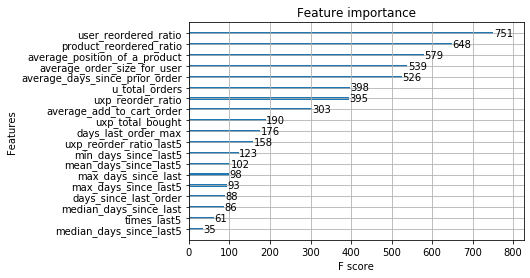

In [95]:
# TRAIN FULL 
###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost as xgb

##########################################
## SPLIT DF TO: X_train, y_train (axis=1)
##########################################
X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered

########################################
## SET BOOSTER'S PARAMETERS
########################################
parameters = {'eval_metric':'logloss', 
              'max_depth':'5', 
              'colsample_bytree':'0.6',
              'subsample':'0.8',
             }

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

########################################
## TRAIN MODEL
########################################
model = xgbc.fit(X_train, y_train)

##################################
# FEATURE IMPORTANCE - GRAPHICAL
##################################
xgb.plot_importance(model)

In [96]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'parameters': {'eval_metric': 'logloss',
  'max_depth': '5',
  'colsample_bytree': '0.6',
  'subsample': '0.8'},
 'num_boost_round': 10}

In [97]:
###########################
## DISABLE WARNINGS
###########################
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

####################################
## SET BOOSTER'S RANGE OF PARAMETERS
# IMPORTANT NOTICE: Fine-tuning an XGBoost model may be a computational prohibitive process with a regular computer or a Kaggle kernel. 
# Be cautious what parameters you enter in paramiGrid section.
# More paremeters means that GridSearch will create and evaluate more models.
####################################    
paramGrid = {"max_depth":[5,10],
            "colsample_bytree":[0.3,0.4]}  

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', num_boost_round=10)

##############################################
## DEFINE HOW TO TRAIN THE DIFFERENT MODELS
#############################################
gridsearch = GridSearchCV(xgbc, paramGrid, cv=3, verbose=2, n_jobs=1)

################################################################
## TRAIN THE MODELS
### - with the combinations of different parameters
### - here is where GridSearch will be exeucuted
#################################################################
model = gridsearch.fit(X_train, y_train)

##################################
## OUTPUT(S)
##################################
# Print the best parameters
print("The best parameters are: /n",  gridsearch.best_params_)

# Store the model for prediction (chapter 5)
model = gridsearch.best_estimator_

# Delete X_train , y_train
del [X_train, y_train]


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.3, max_depth=5 ...............................
[12:28:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] ................ colsample_bytree=0.3, max_depth=5, total=  50.7s
[CV] colsample_bytree=0.3, max_depth=5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.8s remaining:    0.0s


[12:29:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] ................ colsample_bytree=0.3, max_depth=5, total=  52.2s
[CV] colsample_bytree=0.3, max_depth=5 ...............................
[12:30:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] ................ colsample_bytree=0.3, max_depth=5, total=  58.2s
[

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 16.4min finished


[12:44:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The best parameters are: /n {'colsample_bytree': 0.4, 'max_depth': 5}


In [98]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.4,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss',
 'num_boost_round': 10}

In [99]:
# Predict values for test data with our model from chapter 5 - the results are saved as a Python array
test_pred = model.predict(data_test).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
## OR set a custom threshold (in this problem, 0.21 yields the best prediction)
test_pred = (model.predict_proba(data_test)[:,1] >= 0.21).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [101]:
#Save the prediction in a new column in the data_test DF
data_test['prediction'] = test_pred
data_test.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
22      2452                       2           0.181818   
        4217                       1           0.333333   
        4421                       1           0.090909   
        5212                       1           0.125000   
        5450                       1           0.125000   

                    uxp_reorder_ratio_last5  times_last5  times_last5_ratio  \
user_id product_id                                                            
22      2452                       0.000000          0.0                0.0   
        4217                       0.333333          1.0                0.2   
        4421                       0.000000          0.0                0.0   
        5212                       0.000000          0.0                0.0   
        5450                       0.000000          0.0                0.0   

                    max_days_since_last5  days_since_last_order  \
user_id product_id                                                
22      2452                         0.0                    0.0   
        4217                         5.0                    1.0   
        4421                         0.0                    0.0   
        5212                         0.0                    0.0   
        5450                         0.0                    0.0   

                    max_days_since_last  days_last_order_max  \
user_id product_id                                             
22      2452                        0.0                  0.0   
        4217                        5.0                  0.2   
        4421                        0.0                  0.0   
        5212                        0.0                  0.0   
        5450                        0.0                  0.0   

                    min_days_since_last5  ...  median_days_since_last  \
user_id product_id                        ...                           
22      2452                         0.0  ...                     0.0   
        4217                         5.0  ...                     5.0   
        4421                         0.0  ...                     0.0   
        5212                         0.0  ...                     0.0   
        5450                         0.0  ...                     0.0   

                    median_days_since_last5  average_order_size_for_user  \
user_id product_id                                                         
22      2452                            0.0                          0.0   
        4217                            5.0                          4.6   
        4421                            0.0                          0.0   
        5212                            0.0                          0.0   
        5450                            0.0                          0.0   

                    average_add_to_cart_order  average_days_since_prior_order  \
user_id product_id                                                              
22      2452                              0.0                        0.000000   
        4217                              5.0                       11.952381   
        4421                              0.0                        0.000000   
        5212                              0.0                        0.000000   
        5450                              0.0                        0.000000   

                    u_total_orders  user_reordered_ratio  \
user_id product_id                                         
22      2452                    15              0.507246   
        4217                    15              0.507246   
        4421                    15              0.507246   
        5212                    15              0.507246   
        5450                    15              0.507246   

                    product_reordered_ratio  average_position_of_a_product  \
user_id product_id   

In [102]:
#Reset the index
final = data_test.reset_index()
#Keep only the required columns to create our submission file (Chapter 6)
final = final[['product_id', 'user_id', 'prediction']]

gc.collect()
final.head()

,product_id,user_id,prediction
0,2452,22,0
1,4217,22,0
2,4421,22,0
3,5212,22,0
4,5450,22,0


In [103]:
orders_test = orders.loc[orders.eval_set=='test',("user_id", "order_id") ]
orders_test.head()

,user_id,order_id
272,22,139655
588,40,2431024
1148,75,1970262
1445,94,622677
1875,129,688716


In [104]:
final = final.merge(orders_test, on='user_id', how='left')
final.head()

,product_id,user_id,prediction,order_id
0,2452,22,0,139655
1,4217,22,0,139655
2,4421,22,0,139655
3,5212,22,0,139655
4,5450,22,0,139655


In [105]:
#remove user_id column
final = final.drop('user_id', axis=1)
#convert product_id as integer
final['product_id'] = final.product_id.astype(int)

#Remove all unnecessary objects
del orders
del orders_test
gc.collect()

final.head()

,product_id,prediction,order_id
0,2452,0,139655
1,4217,0,139655
2,4421,0,139655
3,5212,0,139655
4,5450,0,139655


In [106]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

{139655: '13176 21903 22935 24964 27845 32655',
 2431024: '5322 5450 5699 6975 13176 17044 22035 24799 27555 29926 34217 39928',
 1970262: '45 4274 4562 11520 12872 13176 21267 21567 21903 22451 24964 26369 27104 27105 28058 29071 29418 30489 44683 48364',
 688716: '3721 5077 13176 36929 47209 47626',
 1920100: '2748 9444 19173 21903 22582 22908 30391 34458 35221 46969 47209 49235',
 2088686: '1516 3583 5380 5479 9390 23236 26128 27531 29837 30489 31553 39877 39928 40311 42265 45007 46802 47626',
 2305779: '12341 22938 30233 42043 48174',
 2193705: '4149 6087 6184 8048 12341 21903 29223 30827 38768 39275 40120 40742 48762',
 1185710: '9839 14715 21137 21267 21903 22935 24852 24964 27548 27845 28204 38689 39216 45633 49236',
 442242: '3957 7521 25718',
 1918388: '5134 14084 25931 27104 33120 39639 42265 42585',
 1990335: '10749 21663 43598 43768 43961',
 668032: '6347',
 476412: '5450 24852 32153',
 2151106: '4776 13176 16541 21137 28227 43352 47141',
 836275: '5460 10673 12817 13293 13

In [107]:
#Convert the dictionary into a DataFrame
sub = pd.DataFrame.from_dict(d, orient='index')

#Reset index
sub.reset_index(inplace=True)
#Set column names
sub.columns = ['order_id', 'products']

sub.head()

,order_id,products
0,139655,13176 21903 22935 24964 27845 32655
1,2431024,5322 5450 5699 6975 13176 17044 22035 24799 27...
2,1970262,45 4274 4562 11520 12872 13176 21267 21567 219...
3,688716,3721 5077 13176 36929 47209 47626
4,1920100,2748 9444 19173 21903 22582 22908 30391 34458 ...


In [108]:
#Check if sub file has 75000 predictions
sub.shape[0]
print(sub.shape[0]==75000)

False


In [109]:
sub.to_csv('sub.csv', index=False)